In [42]:
import pandas as pd
import numpy as np

In [43]:
data_wig20 = pd.read_csv("../../data/wig20_2005.csv")
data_kghm = pd.read_csv("../../data/kgh_2005.csv")

In [44]:
data_kghm['Zwrot'] = data_kghm['Zamkniecie'].pct_change()
data_wig20['Zwrot'] = data_wig20['Zamkniecie'].pct_change()

In [45]:
data_wig20['Data'] = pd.to_datetime(data_wig20['Data'])
data_kghm['Data'] = pd.to_datetime(data_kghm['Data'])

In [46]:
data_wig20.set_index('Data', inplace=True)
data_kghm.set_index('Data', inplace=True)

In [47]:
window_length = 90

In [48]:
rolling_betas = [np.nan] * window_length 

In [49]:
for end_index in range(window_length, len(data_kghm)):
    window_data_kghm = data_kghm.iloc[end_index-window_length:end_index]
    window_data_wig20 = data_wig20.iloc[end_index-window_length:end_index]

    covariance_matrix = np.cov(window_data_kghm['Zwrot'], window_data_wig20['Zwrot'])
    covariance = covariance_matrix[0, 1]
    
    variance = np.var(window_data_wig20['Zwrot'])

    beta = covariance / variance if variance != 0 else np.nan
    
    rolling_betas.append(beta)

In [50]:
rolling_betas = rolling_betas[:len(data_kghm)]

In [51]:
data_kghm['Beta'] = rolling_betas

In [52]:
data_kghm.tail(10)

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,Zwrot,Beta
Data,,,,,,,
2023-12-14,117.90,122.10,117.9,121.50,1152537.0,0.051038,1.096928
2023-12-15,121.70,125.30,121.5,123.30,2030034.0,0.014815,1.108056
2023-12-18,122.60,124.90,122.5,124.20,482148.0,0.007299,1.117672
2023-12-19,123.55,127.00,123.4,126.10,474447.0,0.015298,1.129581
2023-12-20,127.00,128.40,123.8,123.95,500296.0,-0.017050,1.127167
2023-12-21,123.95,124.55,122.9,123.90,354356.0,-0.000403,1.129281
2023-12-22,124.45,125.65,123.8,123.80,188580.0,-0.000807,1.119223
2023-12-27,125.00,126.45,124.7,125.60,539071.0,0.014540,1.119489
2023-12-28,125.75,126.70,124.6,124.70,420054.0,-0.007166,1.118000


In [53]:
data_kghm.to_csv("../../data/kgh_2005_beta.csv", index=True)

In [54]:
start_date = data_kghm.index[90]

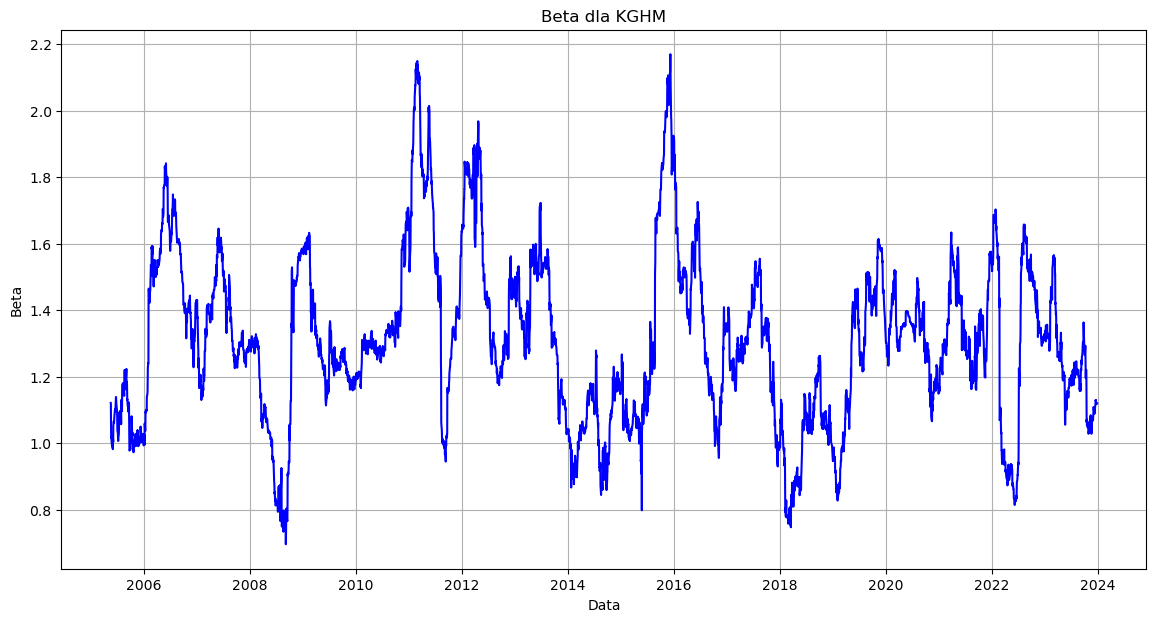

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data_kghm.loc[start_date:].index, data_kghm.loc[start_date:]['Beta'], color='blue')
plt.title('Beta dla KGHM')
plt.xlabel('Data')
plt.ylabel('Beta')
plt.grid(True)
plt.show()

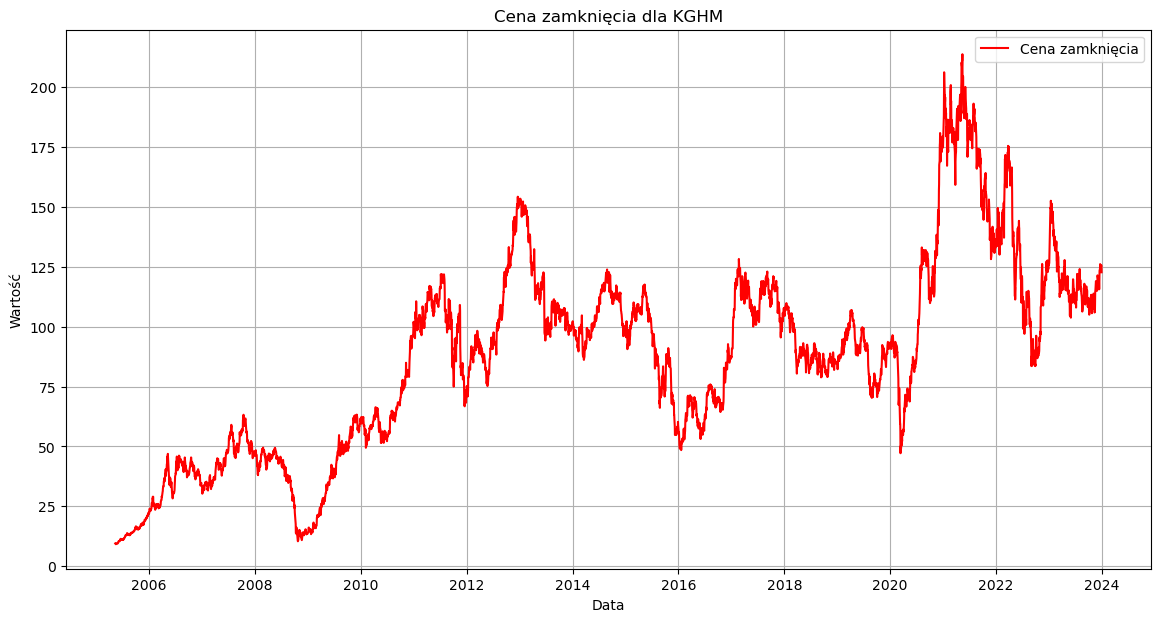

In [56]:
start_date = data_kghm.index[90]

plt.figure(figsize=(14, 7))
plt.plot(data_kghm.loc[start_date:].index, data_kghm.loc[start_date:]['Zamkniecie'], color='red', label='Cena zamknięcia')
plt.title('Cena zamknięcia dla KGHM')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.grid(True)
plt.legend()
plt.show()

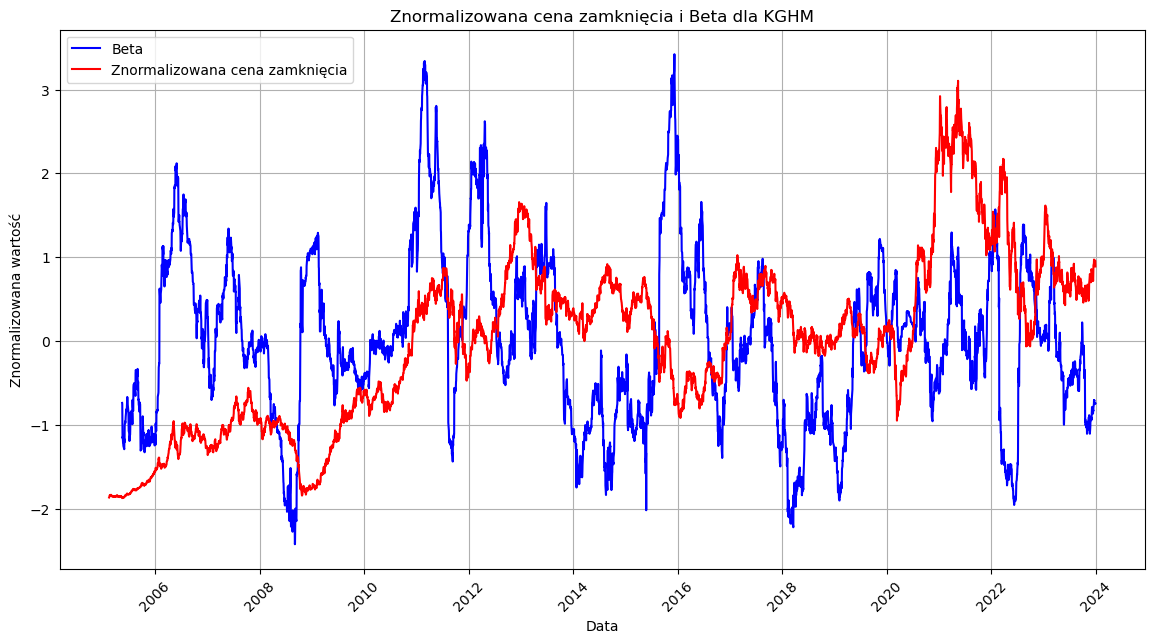

In [57]:
start_date = data_kghm.index[30]

normalized_rolling_beta = (data_kghm.loc[start_date:]['Beta'] - data_kghm.loc[start_date:]['Beta'].mean()) / data_kghm.loc[start_date:]['Beta'].std()
normalized_closing_price = (data_kghm.loc[start_date:]['Zamkniecie'] - data_kghm.loc[start_date:]['Zamkniecie'].mean()) / data_kghm.loc[start_date:]['Zamkniecie'].std()

plt.figure(figsize=(14, 7))
plt.plot(data_kghm.loc[start_date:].index, normalized_rolling_beta, color='blue', label='Beta')
plt.plot(data_kghm.loc[start_date:].index, normalized_closing_price, color='red', label='Znormalizowana cena zamknięcia')
plt.title('Znormalizowana cena zamknięcia i Beta dla KGHM')
plt.xlabel('Data')
plt.ylabel('Znormalizowana wartość')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()